# 3D_HOUSE PROJECT
### let's install and import dependancies


In [20]:
!pip install rasterio
!pip install numpy
!pip install matplotlib
!pip install geocoder
!pip install pyproj


In [21]:
import geocoder
import rasterio
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from rasterio.plot import show
from rasterio.mask import mask
from pyproj import Proj, transform

In [22]:
# les DTM représentes les données au sol
# les DSM représentes les données au dessus du sol

dtm = rasterio.open('data/dtm/RELIEF_HAINAUT_MNT_2013_2014.tif')
dsm = rasterio.open('data/dsm/RELIEF_HAINAUT_MNS_2013_2014.tif')

### Fonction de découpage pour le tiff qui va prendre en entrée un fichier tiff et un fichier geojson

In [ ]:
# raster = tiff, shape = geojson
# découpage du tiff selon un géojson pour pouvoir l'afficher par la suite

def crop_raster(raster, shape):
  """Crop the raster with a given shape (Polygon)"""

  print(f'shape :{shape}')

  # Crop the raster
  out_image, out_transform = rasterio.mask.mask(raster, shapes=shape, all_touched=True, crop=True)
  out_meta = raster.meta
  print(f'out meta :{out_meta}')

  out_image = np.moveaxis(out_image.squeeze(), -1, 0)

  # Display the result
  plt.figure(figsize=(10, 14))
  plt.imshow(out_image)
  plt.colorbar(shrink=0.5)
  plt.show()

  # Update the new tiff file metadata
  out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[0],
                 "width": out_image.shape[1],
                 "transform": out_transform })
                 #'nodata': no_data})

  return out_image, out_meta

### création du geojson a partir d'une adresse

In [ ]:
# Geocoding d'une adresse via geocoder

g = geocoder.osm('marcinelle')
print(g.json)

g = geocoder.osm('avenue de philippeville 159, 6001 marcinelle')
print(g.json)

coord = g.osm['x'],g.osm['y']
print(coord)

In [ ]:
# transformation des coordonées en lambert72

inProj = Proj(init='epsg:4326')
outProj = Proj(init='epsg:31370')

x1,y1 = coord
x2,y2 = transform(inProj,outProj,x1,y1)

print(x2,y2)

In [ ]:
# Fonction de découpage en carré
# r = rayon

def square(x,y,r):
  geojson = [{'type': 'Polygon', 'coordinates': [[(x - r, y - r), (x + r, y - r), (x + r, y + r), (x - r, y + r)]]}]
  return geojson

geojson = square(x2,y2,500)
print(geojson)


## Affichage du tiff découpé selon l'adresse entrées

In [ ]:
result = crop_raster(dsm,geojson)

In [25]:
# raster = tiff, shape = geojson
# découpage du tiff selon un géojson pour pouvoir l'afficher par la suite

def crop_raster(raster, shape):
  """Crop the raster with a given shape (Polygon)"""

  print(f'shape :{shape}')

  # Crop the raster
  out_image, out_transform = rasterio.mask.mask(raster, shapes=shape, all_touched=True, crop=True)
  out_meta = raster.meta
  print(f'out meta :{out_meta}')

  out_image = np.moveaxis(out_image.squeeze(), -1, 0)

  # Display the result
  plt.figure(figsize=(10, 14))
  plt.imshow(out_image)
  plt.colorbar(shrink=0.5)
  plt.show()

  # Update the new tiff file metadata
  out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[0],
                 "width": out_image.shape[1],
                 "transform": out_transform })
                 #'nodata': no_data})

  return out_image, out_meta

### création du geojson a partir d'une adresse

In [30]:
# Geocoding d'une adresse via geocoder

g = geocoder.osm('marcinelle')
print(g.json)

g = geocoder.osm('avenue de philippeville 159, 6001 marcinelle')
print(g.json)

coord = g.osm['x'],g.osm['y']
print(coord)

{'accuracy': 0.4, 'address': 'Marcinelle, Charleroi, Hainaut, Wallonie, 6001, België - Belgique - Belgien', 'bbox': {'northeast': [50.4116325, 4.4623268], 'southwest': [50.3527894, 4.4168098]}, 'city': 'Charleroi', 'confidence': 6, 'country': 'België - Belgique - Belgien', 'country_code': 'be', 'county': 'Hainaut', 'district': 'Marcinelle', 'icon': 'https://nominatim.openstreetmap.org/images/mapicons/poi_boundary_administrative.p.20.png', 'importance': 0.4, 'lat': 50.38036945, 'lng': 4.439727567316614, 'ok': True, 'osm_id': 3411182, 'osm_type': 'relation', 'place_id': 235683908, 'place_rank': 18, 'postal': '6001', 'quality': 'administrative', 'raw': {'place_id': 235683908, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 3411182, 'boundingbox': ['50.3527894', '50.4116325', '4.4168098', '4.4623268'], 'lat': '50.38036945', 'lon': '4.439727567316614', 'display_name': 'Marcinelle, Charleroi, Hainaut, Wallonie, 6001, Belg

In [31]:
# transformation des coordonées en lambert72

inProj = Proj(init='epsg:4326')
outProj = Proj(init='epsg:31370')

x1,y1 = coord
x2,y2 = transform(inProj,outProj,x1,y1)

print(x2,y2)

/home/leers/Project/turing4/3D_houses/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/home/leers/Project/turing4/3D_houses/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
/home/leers/Project/turing4/3D_houses/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<auth

155919.14197459817 121125.08941813558


In [34]:
# Fonction de découpage en carré
# r = rayon

def square(x,y,r):
  geojson = [{'type': 'Polygon', 'coordinates': [[(x - r, y - r), (x + r, y - r), (x + r, y + r), (x - r, y + r)]]}]
  return geojson

geojson = square(x2,y2,500)
print(geojson)


[{'type': 'Polygon', 'coordinates': [[(155419.14197459817, 120625.08941813558), (156419.14197459817, 120625.08941813558), (156419.14197459817, 121625.08941813558), (155419.14197459817, 121625.08941813558)]]}]


## Affichage du tiff découpé selon l'adresse entrées

shape :[{'type': 'Polygon', 'coordinates': [[(155419.14197459817, 120625.08941813558), (156419.14197459817, 120625.08941813558), (156419.14197459817, 121625.08941813558), (155419.14197459817, 121625.08941813558)]]}]
out meta :{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 126000, 'height': 98000, 'count': 1, 'crs': CRS.from_epsg(31370), 'transform': Affine(1.0, 0.0, 42000.0,
       0.0, -1.0, 167999.99999999927)}


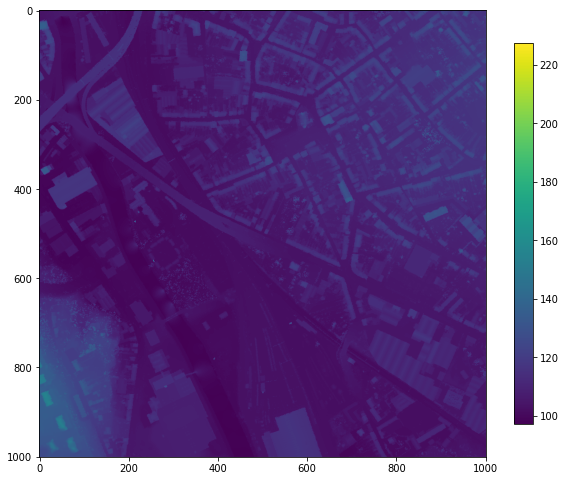

In [35]:
result = crop_raster(dsm,geojson)